In [1]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
text = []
with open("inflated_dataset_alcfirst.txt") as infile:
    for line in infile.readlines():
        text.append(line.lower().replace('"', ''))
len(text)

2730

In [0]:
long_string = ""
for string in text:
    long_string += string

chars = sorted(list(set(long_string)))

In [8]:
print('corpus length:', len(text))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

corpus length: 2730
total chars: 37


In [9]:
# Modularize later to calc. max len
max_len = 0
for i in text:
    if len(i) > max_len:
        max_len = len(i)
print(max_len)

143


In [10]:
# cut the text in semi-redundant sequences of max_len characters
step = 2 # how many characters to skip until next sentence starts
sentences = []
next_chars = []
for i in range(0, len(long_string) - max_len, step):
    sentences.append(long_string[i: i + max_len])
    next_chars.append(long_string[i + max_len])
print('nb sequences:', len(sentences))


nb sequences: 62636


In [11]:
print('Vectorization...')
x = np.zeros((len(sentences), max_len, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorization...


In [12]:
(y.shape, x.shape)

((62636, 37), (62636, 143, 37))

In [13]:
len(sentences)

62636

In [0]:
#sentences

In [18]:
# build the model: a single LSTM with 256 nodes
print('Build model...')
model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(max_len, len(chars))))
model.add(LSTM(128,input_shape=(max_len, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


Build model...


In [0]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [0]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print('\n')
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - max_len - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('\n')
        print('----- diversity:', diversity)

        generated = ''
        sentence = ''.join(text)[start_index: start_index + max_len]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        #sys.stdout.write(generated)
        print("\n")

        for i in range(400):
            x_pred = np.zeros((1, max_len, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        #print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [0]:
model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback])
model.save('lstm_2_128_alc_first')

Epoch 1/60
62636/62636 [==============================] - 221s 4ms/step - loss: 1.8644


----- Generating text after Epoch: 0


----- diversity: 0.2
----- Generating with seed: " cranberry juice,  sprite
absolut vodka,  peach schnapps,  coconut liqueur,  cranberry juice,  pineapple juice
absolut citron,  sweet and sour,"


  milk,  light rum,  milk,  grenadine,  grenadine,  grenadine,  grenadine,  lemon juice,  grenadine,  grenadine,  crenadine,  creme de menthe,  grenadine,  cream,  cocn-ury,  creme de cocaot sugar,  grenadine,  grenadine,  crenadine,  grenadine,  milk,  creme de menthe,  grenadine,  grenadine,  light rum,  grenadine,  creme de menth cream,  creme de menthe,  sugar,  sugar,  milk,  creme de menthe,

----- diversity: 0.5
----- Generating with seed: " cranberry juice,  sprite
absolut vodka,  peach schnapps,  coconut liqueur,  cranberry juice,  pineapple juice
absolut citron,  sweet and sour,"


  sugar,  light cream,  grenadine,  grenadine,  grenadine,  ginger ane
sugar

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


  maraschino cherry,  marshmallow ch seel,  orange juice,  orange,  cocoa powder,  coffee
blended whiskey,  brandy,  gin,  jack wainneno,  cherry,  sugar,  orange juice
gin,  cemon ginger,  ice
gin,  sweet vermouth,  cloves
gin,  cinnamon,  apple juiEpoch 8/60
62636/62636 [==============================] - 214s 3ms/step - loss: 0.4493


----- Generating text after Epoch: 7


----- diversity: 0.2
----- Generating with seed: " rum,  añejo rum,  orange juice,  lemon juice,  ginger ale,  lemon peel
amaretto,  southern comfort,  ice,  sour mix
cranberry juice,  soda wat"


er,  lemon juice,  lemon peel
gin,  lemon juice,  orange juice,  orange juice,  lemon juice
light rum,  lime juice,  apple juice,  orange juice
vodka,  gin,  cranberry juice
light rum,  orange juice,  orange juice,  apple juice
gin,  cream,  cinnamon,  sugar,  lemon juice
light rum,  lemon juice,  orange juice,  pineapple juice
coffee,  vodka,  cranberries,  vodka
gin,  grand marnier,  lemon juice

----- diversity: 0.5
--

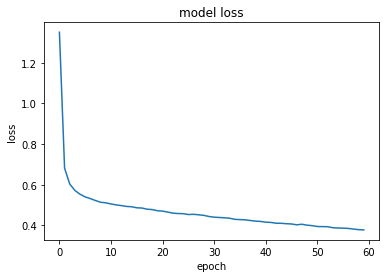

In [0]:
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [0]:
losses = pd.DataFrame(model.history.history['loss'])
losses.to_csv('lstm_2_128_alc_first_losses.csv')

In [0]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
def makePrediction(sentence, diversity, output_length):
  """
  function makes a prediction from model using a seed sentence and specifying an 
  output length
  """
  output = ''
  for i in range(output_length):
      x_pred = np.zeros((1, max_len, len(chars)))
      #convert seed sentence to appropriate enumerated matrix
      for t, char in enumerate(sentence):
          x_pred[0, t, char_indices[char]] = 1.

      preds = model.predict(x_pred, verbose=0)[0]
      next_index = sample(preds, diversity)
      next_char = indices_char[next_index]

      sentence = sentence[1:] + next_char
      output = output + next_char

  return output

In [0]:
sentence = ''.join(text)[23: 23 + max_len]
output_sample = makePrediction(sentence, 1, 10000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [0]:
text_file = open("lstm_2_128_alc_first_output.txt", "w")
n = text_file.write(output_sample)
text_file.close()